In [2]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
#load the data set
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# number of rows and Columns in this dataset
df.shape

(768, 9)

In [6]:
#Check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<AxesSubplot:>

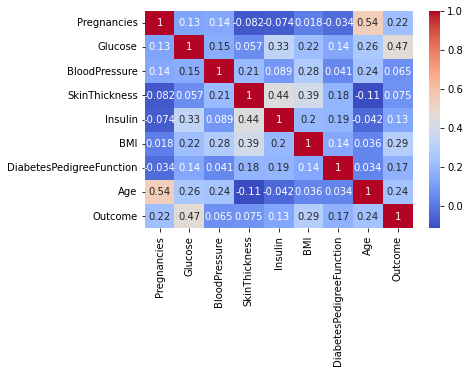

In [10]:
# correlation heatmap of the data set
sb.heatmap(df.corr() , cmap = "coolwarm", annot=True)

The correlation heatmap shows that Glucose has the highest positive correlation(0.47) amongst other parameters. Followed by BMI, Age, and Pregnancies with 0.29, 0.24 and 0.22 correlation coeffecients respectively. While other have very low postive correlation.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

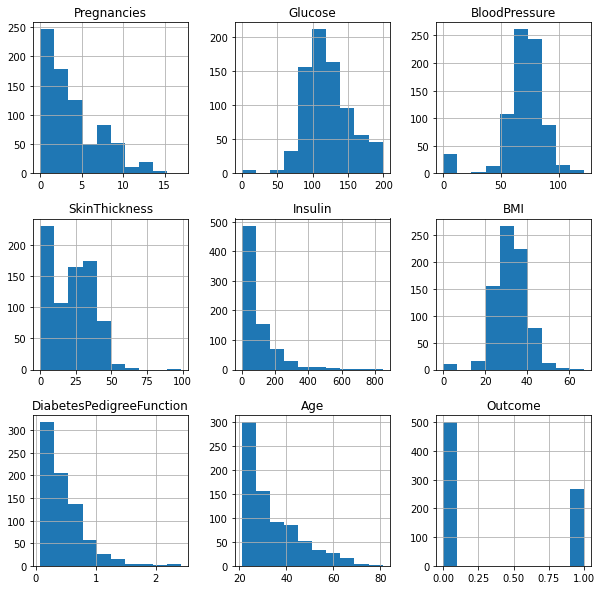

In [11]:
# Checking for skewness in the data
df.hist(figsize=(10,10))

In [12]:
def skew_function():
    
    """ I want to pull out all the skewed columns in the dataframe"""
    
    skew_value = []
    
    for col in df.select_dtypes('number'):
        skew_col = df[col].skew()
        skew_value.append((col , skew_col))
    return sorted(skew_value , key = lambda x : x[1] , reverse = True)

In [13]:
skew_function()

[('Insulin', 2.272250858431574),
 ('DiabetesPedigreeFunction', 1.919911066307204),
 ('Age', 1.1295967011444805),
 ('Pregnancies', 0.9016739791518588),
 ('Outcome', 0.635016643444986),
 ('Glucose', 0.17375350179188992),
 ('SkinThickness', 0.10937249648187608),
 ('BMI', -0.42898158845356543),
 ('BloodPressure', -1.8436079833551302)]

The skewness of the columns are okay

#### Remove target variable from the DataFrame

In [14]:
outcome_label = df['Outcome']
raw_df = df.copy()
df.drop('Outcome' , axis = 1 , inplace = True)

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [16]:
numerical_cols = list(df.select_dtypes('number').columns)

### Data Preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
 # Standardizing the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### Spliting Data into Training and Testing

In [20]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df, outcome_label, test_size=.2, random_state=True)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


### Model training on the data set

In [23]:
#import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# import metric library
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [24]:
# creating an instance of each models
model_1 = LogisticRegression()
#model_1.fit(X_train, y_train)
model_2 = DecisionTreeClassifier()
model_3 = RandomForestClassifier()
model_4 = SVC()

In [25]:
# Model evaluation function
def eval(Model):
    Model = Model.fit(X_train , y_train)
    Model_predict_train = Model.predict(X_train)
    Model_predict_test = Model.predict(X_test)
    
    accuracy_score_train = accuracy_score(Model_predict_train , y_train)
    accuracy_score_test = accuracy_score(Model_predict_test , y_test)
    
    print (f"The model has an accuracy score of {accuracy_score_train} on training and {accuracy_score_test} on testing.")

In [26]:
eval(model_1)

The model has an accuracy score of 0.7752442996742671 on training and 0.7792207792207793 on testing.


In [27]:
eval(model_2)

The model has an accuracy score of 1.0 on training and 0.6753246753246753 on testing.


In [28]:
eval(model_3)

The model has an accuracy score of 1.0 on training and 0.8116883116883117 on testing.


In [29]:
eval(model_4)

The model has an accuracy score of 0.8208469055374593 on training and 0.8051948051948052 on testing.


Model_4(SVC) has the best accuracy of 0.82 and 0.805 on training and testing dataset respectively. While model_2(DecisionTreeClassifier) and model_3(RandomForestClassifier) are both overfitting. model_1(LogisticRegression) has lowest accuracy on both training and testing dataset.

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [31]:
cross_val_score(model_1 , X_train ,y_train ,  cv = 3, scoring="accuracy")

array([0.77560976, 0.7804878 , 0.74509804])

In [32]:
cross_val_score(model_2 , X_train ,y_train ,  cv = 3, scoring="accuracy")

array([0.65365854, 0.70731707, 0.67647059])

In [33]:
cross_val_score(model_4 , X_train ,y_train ,  cv = 3, scoring="accuracy")

array([0.78536585, 0.77073171, 0.75      ])

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
y_predict = model_4.predict(X_test)
print(classification_report(y_test, y_predict)) #print classification report

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        99
           1       0.82      0.58      0.68        55

    accuracy                           0.81       154
   macro avg       0.81      0.76      0.77       154
weighted avg       0.81      0.81      0.80       154



We got 81% accuracy

In [36]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[92,  7],
       [23, 32]], dtype=int64)

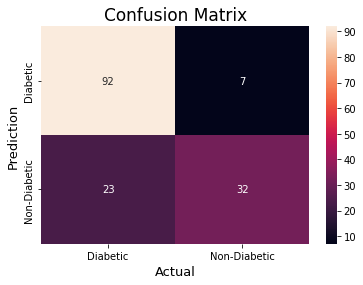

In [37]:
#Plot the confusion matrix.
sb.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Diabetic', 'Non-Diabetic'],
            yticklabels=['Diabetic', 'Non-Diabetic'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Hyperparameter Tuning Using GridsearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']}

grid_model = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid_model.fit(X_train, y_train)

In [44]:
# print best parameter after tuning
print(grid_model.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_model.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)


In [45]:
grid_predictions = grid_model.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        99
           1       0.78      0.53      0.63        55

    accuracy                           0.78       154
   macro avg       0.78      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154



In [46]:
cm = confusion_matrix(y_test, grid_predictions)
cm

array([[91,  8],
       [26, 29]], dtype=int64)

The hyperparameter tuning doesn't optimize the model, so we won't make use of the grid_model.

### Saving the trained model and Scaler object

In [55]:
import pickle

In [56]:
filename = 'trained_model.sav'
pickle.dump(model_4, open(filename, 'wb'))

In [57]:
# Saving scaler object with pickle
scaler_name = 'scaler_object.sav'
pickle.dump(scaler, open(scaler_name, 'wb'))

In [58]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

### Making a Predictive System

In [59]:
input_values = (5,166,72,19,175,25.8,0.587,51)

input_value_as_array = np.asarray(input_values)
input_data_reshape=input_value_as_array.reshape(1,-1)
# Standardizing the user input with standard scaler
input_data_reshape = scaler.transform(input_data_reshape)
prediction =loaded_model.predict(input_data_reshape)
print(prediction)
if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

C:\Users\LAWRENCE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[1]
The person is diabetic


C:\Users\LAWRENCE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
